In [1]:
import numpy as np
import matplotlib.pyplot as plt

import symmetric_methods as sm


In [2]:
# MLP structure

L = 7

dim = np.zeros((L+1,))

dim[0] = 3
dim[1] = 4
dim[2] = 5
dim[3] = 6
dim[4] = 7
dim[5] = 8
dim[6] = 9
dim[7] = 10
#dim[8] = 11
#dim[9] = 12

dim= dim.astype(int)


In [3]:
# draw random parameters, generate matrix and make it positive definite 

wm = np.random.normal(0,1,(L,))
wd = np.random.normal(0,1,(4,L))
wt = np.random.normal(0,1,(2,L-1))
wo = np.random.normal(0,1,((L-2)*(L-1)//2,))

#wt[1,:]=0
#wd = np.zeros((4,L))
#wt = np.zeros((2,L-1))
#wo = np.zeros(((L-2)*(L-1)//2,))

meang = sm.par2mean(L,dim,wm)
covg = sm.par2cov(L,dim,wd,wt,wo)


covg2 = covg @ covg
evl, evc = np.linalg.eigh(covg2)
sqrtcovg2 = (evc * np.sqrt(evl)) @ evc.T



In [6]:
# test the grad2par function with exact estimation

npar = 0
for iL in np.arange(0,L):
    npar = npar + dim[iL] * dim[iL+1]
npar = npar.astype(int)
    
grad = np.sqrt(npar) * sqrtcovg2

wd2, wt2, wo2 = sm.cov2par(L,dim,covg2)

#wm2est, wd2est, wt2est, wo2est = sm.grad2par(L,dim,grad)
wm2est, wd2est, wt2est, wo2est = sm.grad2par_fast(L,dim,grad)

meangest = sm.par2mean(L,dim,wm2est)
covg2est = sm.par2cov(L,dim,wd2est,wt2est,wo2est)


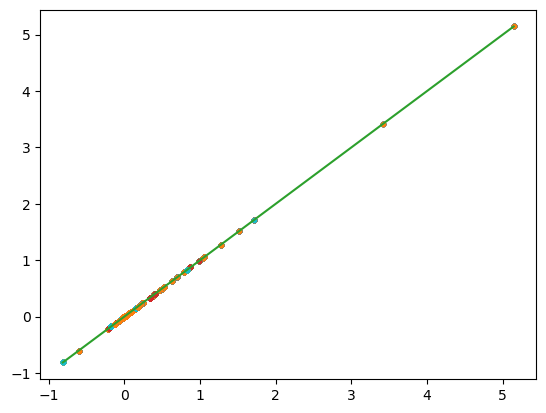

[3.21060120e+00 4.23034620e+00 1.22286025e-01 4.04933809e-02
 9.75089464e-01 4.72905519e-02 2.62191390e-03]
[3.21060120e+00 4.23034620e+00 1.22286025e-01 4.04933809e-02
 9.75089464e-01 4.72905519e-02 2.62191390e-03]
[-0.65644193 -1.80195099  5.37875242  0.48266773  5.40140034  1.12502671
  1.6316347 ]
[-0.65644193 -1.80195099  5.37875242  0.48266773  5.40140034  1.12502671
  1.6316347 ]
[-1.2618823   0.86593263  1.77762735  3.2236999  -0.6368827   3.52019409
  0.33938753]
[-1.2618823   0.86593263  1.77762735  3.2236999  -0.6368827   3.52019409
  0.33938753]
[ 9.51789284 21.14671831  4.21598649 14.00458142  8.5049068   5.83668311
  0.97104965]
[ 9.51789284 21.14671831  4.21598649 14.00458142  8.5049068   5.83668311
  0.97104965]
[-0.32657499 -2.12144186  0.93948154 -4.43971362 -0.33619291 -0.80322832]
[-0.32657499 -2.12144186  0.93948154 -4.43971362 -0.33619291 -0.80322832]
[ 7.37584471 -4.24949622 -3.7588603  -8.42774334  3.49636789  1.45729951]
[ 7.37584471 -4.24949622 -3.7588603  -8.

In [7]:

plt.plot(covg2,covg2est,linestyle='none',marker='.')
plt.plot([np.min(covg2), np.max(covg2)],[np.min(covg2), np.max(covg2)])
plt.show()

for ip in np.arange(0,4):
    print(wd2[ip,:])
    print(wd2est[ip,:])

for ip in np.arange(0,2):
    print(wt2[ip,:])
    print(wt2est[ip,:])

print(wo2)
print(wo2est)


In [ ]:
# test the grad2par function with approximate estimation (a small set of R vectors)

R = 1000

npar = 0
for iL in np.arange(0,L):
    npar = npar + dim[iL] * dim[iL+1]
npar = npar.astype(int)
    
grad = np.random.normal(0.,1.,(npar,R))

grad = sqrtcovg2 @ grad

wd2, wt2, wo2 = sm.cov2par(L,dim,covg2)

wm2est, wd2est, wt2est, wo2est = sm.grad2par(L,dim,grad)

meangest = sm.par2mean(L,dim,wm2est)
covg2est = sm.par2cov(L,dim,wd2est,wt2est,wo2est)


In [ ]:

plt.plot(covg2,covg2est,linestyle='none',marker='.')
plt.plot([np.min(covg2), np.max(covg2)],[np.min(covg2), np.max(covg2)])
plt.show()

for ip in np.arange(0,4):
    print(wd2[ip,:])
    print(wd2est[ip,:])

for ip in np.arange(0,2):
    print(wt2[ip,:])
    print(wt2est[ip,:])

print(wo2)
print(wo2est)
